# Step Analysis
## Questions

- Stacked bar chart: Steps each day vs goal
- How many total steps this week? 
- How many kms does this equal to? (See 'Total Distance')
- What is the average daily steps? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# What week is it?
week = "Week 46"

try:
    # Import in CSV file and skip the first row
    steps = pd.read_csv('Week 46/Steps.csv')
    new_column_names = ['Date', 'Actual', 'Goal']
    
    # Ensure the number of new column names matches the number of columns in the DataFrame
    if len(new_column_names) == len(steps.columns):
        steps.columns = new_column_names
    else:
        print("Error: The number of new column names does not match the number of columns in the DataFrame")

    # Set 'Date' as the index so that xticks become the 'Date' rather than the 0, 1, 2 etc index.
    steps.set_index('Date', inplace=True)

    #print(steps)
    
except FileNotFoundError:
     print("The specified file was not found.")

# Some Math


In [2]:
# Average steps each day:
average_steps = round(steps['Actual'].mean(), 1)

# Total Steps for the week:
total_steps = round(steps['Actual'].sum(), 1)

# Total target steps for the week:
total_target_steps = round(steps['Goal'].sum(), 1)

# Calculate percentage of actual vs goal:
percentage = round((total_steps / total_target_steps) * 100, 1)

Description = f'Your average step count was {int(average_steps)} steps per day this week. \n\nAccumulating to a total of {total_steps} steps. \n\nYou achieved {percentage}% of your total step goal for the week.'


# Some Plotting

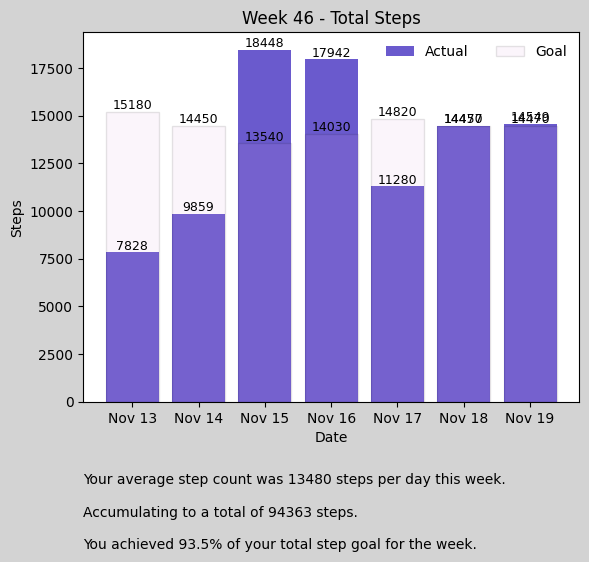

: 

In [3]:
# Rename the dataframe for easy usage
df = steps

# Plotting the bars
fig, ax = plt.subplots()

# Positions of the bar groups
bar_positions = np.arange(len(df))

# Plotting Actual and Goal data
ax.bar(bar_positions, df['Actual'], label='Actual', alpha=1, color='slateblue')
ax.bar(bar_positions, df['Goal'], label='Goal', alpha=0.1, color='plum', edgecolor='black')

# Annotating bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height, '{:.0f}'.format(height), ha='center', va='bottom', size=9)

# Setting the background color
fig.set_facecolor('lightgrey')
ax.set_facecolor('white')

# Customizing the legend, labels, and title
ax.legend(loc='upper right', frameon=False, ncol=2)
ax.set_xlabel('Date', color='black')
ax.set_ylabel('Steps', color='black')
ax.set_title(week + ' - Total Steps', color='black')

# ax.set_xticks(bar_positions) puts index[0] at the first bar, rather than ON the y-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(df.index)

ax.annotate(Description,
            xy = (0.0, -0.3),
            xycoords='axes fraction',
            ha='left',
            va="center",
            fontsize=10)

# This does show the fig/ax but also removes all the weird text that appears
plt.show()